## Binary Classification

First 5 Xs: 
 [[-0.51839217 -0.66522091]
 [ 0.78398275 -0.00098577]
 [ 0.12616247 -0.75963138]
 [-0.70384469 -0.32717022]
 [ 0.67524498 -0.34785267]]
First 5 ys: 
 [1 1 1 1 1]


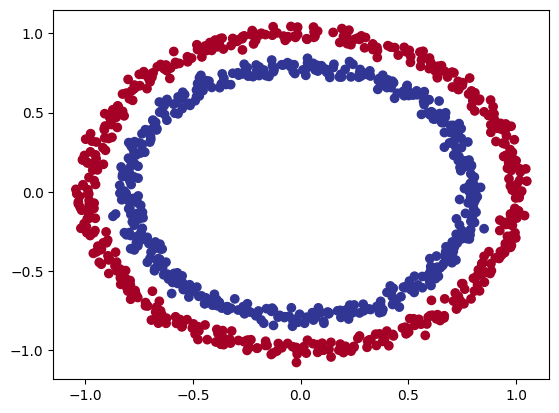

In [84]:
# Classification with neural network
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make 1000 samples
X, y = make_circles(1000, noise=0.03, random_state=69)

print(f"First 5 Xs: \n {X[:5]}")
print(f"First 5 ys: \n {y[:5]}")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [85]:
# Check shapes for error prevention
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [86]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split

# Change from numpy array to tensors
X = torch.from_numpy(X).type(dtype=torch.float32)
y = torch.from_numpy(y).type(dtype=torch.float32)

# Split data into test and data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

class CircleSeparator(nn.Module):
    def __init__(self):
        super().__init__()

        # Create two linear layers
        self.linear_layer_1 = nn.Linear(in_features=2, out_features=8) # out-features of this layer must match in-features of next year
        self.linear_layer_2 = nn.Linear(in_features=8, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_2(self.linear_layer_1(x))
    
# circleSep = CircleSeparator().to(device)
# next(circleSep.parameters())

Using device: cuda


In [87]:
def accuracy(true, pred):
    correct = torch.eq(true, pred).sum().item()
    return (correct/len(true))*100 

In [88]:
# Another way to replicate the model above
# Implicit forward method
torch.manual_seed(69)

circleSep_2 = nn.Sequential(nn.Linear(in_features=2, out_features=8),
                            nn.Linear(in_features=8, out_features=16),
                            nn.Linear(in_features=16, out_features=1)).to(device)

# circleSep_2.state_dict()

# nn.BCELossWithLogitsLoss() is nn.BCELoss and a sigmoid activation function combined but with higher numerical stability
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=circleSep_2.parameters(), lr=0.01)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 200
for epoch in range(epochs):
    circleSep_2.train()
    
    # Raw logits -> Prediction Proabilities -> Prediction Labels
    train_logits = circleSep_2(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_func(train_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as inputs
    train_acc = accuracy(y_train, train_pred)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    circleSep_2.eval()
    with torch.inference_mode():
        test_logits = circleSep_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_func(test_logits, y_test)
        test_acc = accuracy(y_test, test_pred)

    if (epoch % 10 == 0):
        print(f"Epoch: {epoch} | Training Loss: {train_loss:.2f}, Training Accuracy: {train_acc:.2f}% | Testing Loss: {test_loss:.2f}, Testing Accuracy: {test_acc:.2f}%")


Epoch: 0 | Training Loss: 0.70, Training Accuracy: 50.75% | Testing Loss: 0.71, Testing Accuracy: 47.00%


Epoch: 10 | Training Loss: 0.70, Training Accuracy: 50.75% | Testing Loss: 0.71, Testing Accuracy: 47.00%
Epoch: 20 | Training Loss: 0.70, Training Accuracy: 47.50% | Testing Loss: 0.71, Testing Accuracy: 45.00%
Epoch: 30 | Training Loss: 0.70, Training Accuracy: 43.00% | Testing Loss: 0.71, Testing Accuracy: 40.50%
Epoch: 40 | Training Loss: 0.70, Training Accuracy: 41.38% | Testing Loss: 0.71, Testing Accuracy: 39.00%
Epoch: 50 | Training Loss: 0.70, Training Accuracy: 43.12% | Testing Loss: 0.71, Testing Accuracy: 43.00%
Epoch: 60 | Training Loss: 0.70, Training Accuracy: 44.50% | Testing Loss: 0.70, Testing Accuracy: 46.50%
Epoch: 70 | Training Loss: 0.70, Training Accuracy: 45.38% | Testing Loss: 0.70, Testing Accuracy: 46.50%
Epoch: 80 | Training Loss: 0.70, Training Accuracy: 45.62% | Testing Loss: 0.70, Testing Accuracy: 47.00%
Epoch: 90 | Training Loss: 0.70, Training Accuracy: 46.12% | Testing Loss: 0.70, Testing Accuracy: 46.00%
Epoch: 100 | Training Loss: 0.70, Training Ac

In [89]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("File already exist, skipping download")
else: 
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_decision_boundary

File already exist, skipping download


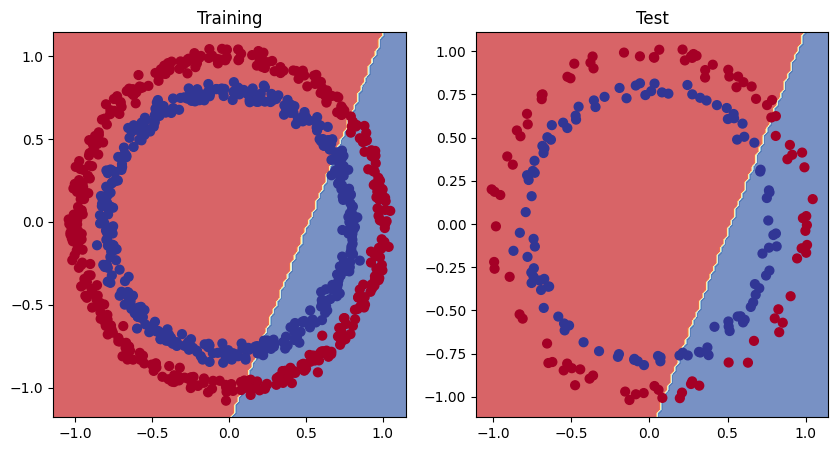

In [90]:
# Plotting the hyperplane of the model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(circleSep_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circleSep_2, X_test, y_test)

Epoch: 0 | Training Loss: 0.6936, Training Accuracy: 49.25% | Testing Loss: 0.69, Testing Accuracy: 53.00%
Epoch: 100 | Training Loss: 0.6884, Training Accuracy: 52.00% | Testing Loss: 0.69, Testing Accuracy: 48.00%
Epoch: 200 | Training Loss: 0.6794, Training Accuracy: 54.37% | Testing Loss: 0.68, Testing Accuracy: 51.00%
Epoch: 300 | Training Loss: 0.6589, Training Accuracy: 65.88% | Testing Loss: 0.67, Testing Accuracy: 63.00%
Epoch: 400 | Training Loss: 0.5948, Training Accuracy: 84.75% | Testing Loss: 0.61, Testing Accuracy: 85.50%
Epoch: 500 | Training Loss: 0.4199, Training Accuracy: 96.25% | Testing Loss: 0.43, Testing Accuracy: 96.00%
Epoch: 600 | Training Loss: 0.3849, Training Accuracy: 77.88% | Testing Loss: 0.40, Testing Accuracy: 79.00%
Epoch: 700 | Training Loss: 0.1828, Training Accuracy: 96.38% | Testing Loss: 0.20, Testing Accuracy: 94.00%
Epoch: 800 | Training Loss: 0.0762, Training Accuracy: 99.75% | Testing Loss: 0.09, Testing Accuracy: 98.50%
Epoch: 900 | Training

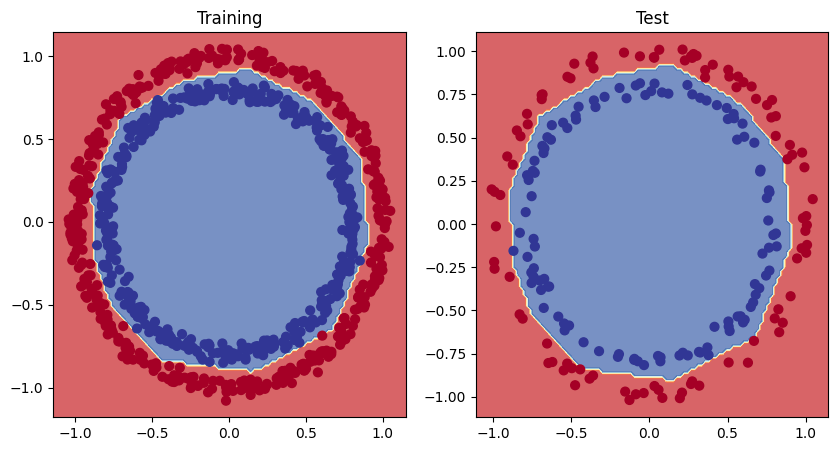

In [91]:
class CircleSeparator2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=2, out_features=8)
        self.linear_layer_2 = nn.Linear(in_features=8, out_features=8)
        self.relu = nn.ReLU()
        self.linear_layer_3 = nn.Linear(in_features=8, out_features=1)
        
    def forward(self, x):
        return self.linear_layer_3(self.relu(self.linear_layer_2(self.relu(self.linear_layer_1(x)))))


circleSep_3 = CircleSeparator2().to(device)

loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=circleSep_3.parameters(), lr=0.2)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1500
for epoch in range(epochs):
    circleSep_3.train()

    train_logits = circleSep_3(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_func(train_logits, y_train)
    train_acc = accuracy(y_train, train_pred)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Testing
    circleSep_3.eval()
    with torch.inference_mode():
        test_logits = circleSep_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_func(test_logits, y_test)
        test_acc = accuracy(y_test, test_pred)

    if (epoch % 100 == 0):
        print(f"Epoch: {epoch} | Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}% | Testing Loss: {test_loss:.2f}, Testing Accuracy: {test_acc:.2f}%")

# Plotting the hyperplane of the model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(circleSep_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(circleSep_3, X_test, y_test)


## Multi-class Classification

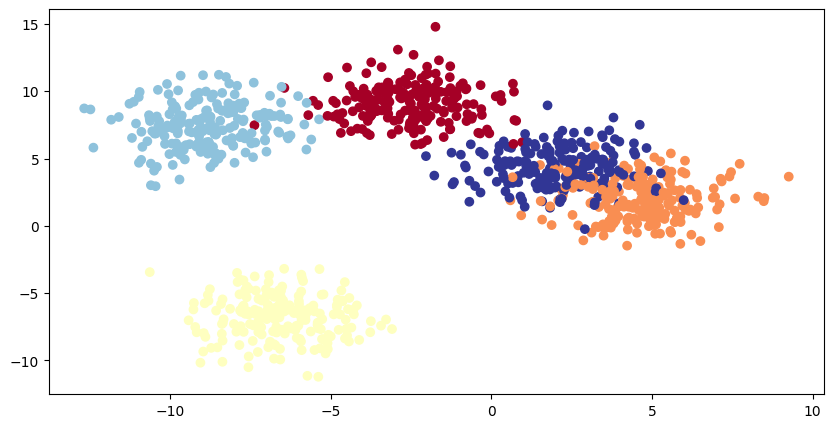

In [92]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Hyperparameters
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 5))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [93]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class blobsSeparator(nn.Module):
    def __init__(self, input_features, output_features, hidden_neurons=8):
        super().__init__()
        self.linear_layer = nn.Sequential(
                            nn.Linear(in_features=input_features, out_features=hidden_neurons),
                            nn.ReLU(),
                            nn.Linear(in_features=hidden_neurons, out_features=hidden_neurons),
                            nn.ReLU(),
                            nn.Linear(in_features=hidden_neurons, out_features=output_features))

    def forward(self, x):
        return self.linear_layer(x)
    
model = blobsSeparator(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_neurons=8)
model.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

X_blob_train = X_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

epochs = 500

for epoch in range(epochs):
    model.train()

    train_logits = model(X_blob_train)
    train_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)

    train_loss = loss_func(train_logits, y_blob_train)
    train_acc = accuracy(y_blob_train, train_pred)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_func(test_logits, y_blob_test)
        test_acc = accuracy(y_blob_test, test_pred)

    if (epoch % 50 == 0):
        print(f"Epoch: {epoch} | Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}% | Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.2f}%")


Epoch: 0 | Training Loss: 1.5214, Training Accuracy: 21.12% | Testing Loss: 1.4285, Testing Accuracy: 42.00%
Epoch: 50 | Training Loss: 0.2534, Training Accuracy: 92.25% | Testing Loss: 0.2506, Testing Accuracy: 92.00%
Epoch: 100 | Training Loss: 0.2014, Training Accuracy: 92.38% | Testing Loss: 0.2047, Testing Accuracy: 92.00%
Epoch: 150 | Training Loss: 0.1917, Training Accuracy: 92.50% | Testing Loss: 0.1950, Testing Accuracy: 92.50%
Epoch: 200 | Training Loss: 0.1871, Training Accuracy: 92.75% | Testing Loss: 0.1899, Testing Accuracy: 92.50%
Epoch: 250 | Training Loss: 0.1836, Training Accuracy: 92.88% | Testing Loss: 0.1852, Testing Accuracy: 92.50%
Epoch: 300 | Training Loss: 0.1805, Training Accuracy: 93.00% | Testing Loss: 0.1816, Testing Accuracy: 92.50%
Epoch: 350 | Training Loss: 0.1778, Training Accuracy: 93.38% | Testing Loss: 0.1791, Testing Accuracy: 92.50%
Epoch: 400 | Training Loss: 0.1751, Training Accuracy: 93.50% | Testing Loss: 0.1760, Testing Accuracy: 92.50%
Epoc

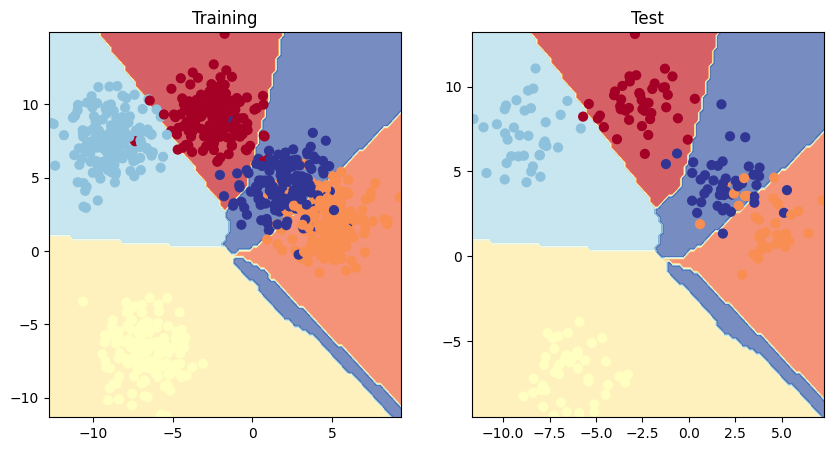

In [94]:
# Plotting the hyperplane of the model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)